In [1]:
from rdkit import rdBase, Chem
from rdkit.Chem import AllChem, Draw, PandasTools
from rdkit.Chem.Draw import IPythonConsole
import sys, py3Dmol
import pandas as pd
print(sys.version)

print(rdBase.rdkitVersion)

3.11.5 (main, Sep 11 2023, 08:31:25) [Clang 14.0.6 ]
2023.09.5


In [2]:
df = pd.read_csv("/Users/lpc_0066/Desktop/Dataset/その他/Volume of Distribution/VDss_dataset_uen.csv")

Generate mol column by PandasTools

In [3]:
PandasTools.AddMoleculeColumnToFrame(df, molCol='mols', smilesCol='SMILES')
df.head(10)

,SMILES,MW,logP,VDss(L/kg),logVDss,mols
0,CC(C)N(CCC(c1ccccc1)c1cc(CO)ccc1O)C(C)C,341.495,4.52530,2.41,0.382017,<rdkit.Chem.rdchem.Mol object at 0x16bab61f0>
1,O=C(OC1C[N+]2(CCCOc3ccccc3)CCC1CC2)C(O)(c1cccs...,484.663,4.66680,4.30,0.633468,<rdkit.Chem.rdchem.Mol object at 0x16bab6340>
2,CC[C@H]1C2C[C@H]3[C@@H]4N(C)c5ccccc5[C@]45C[C@...,326.440,1.55450,4.00,0.602060,<rdkit.Chem.rdchem.Mol object at 0x16bab63b0>
3,C=CC[N+]12CCC34c5ccccc5N5/C=C6/C7CC8C9(CC[N+]8...,666.910,5.47560,0.32,-0.494850,<rdkit.Chem.rdchem.Mol object at 0x16bab6420>
4,CCCS(=O)CCCN(CC)CC(O)COc1ccc(C#N)cc1,352.500,2.16868,1.80,0.255273,<rdkit.Chem.rdchem.Mol object at 0x16bab6490>
5,CNC(=O)C(c1ccccc1)N1CCc2cc(OC)c(OC)cc2C1CCc1cc...,512.572,5.74190,9.75,0.989005,<rdkit.Chem.rdchem.Mol object at 0x16bab6500>
6,C=CCN1CCCC1CNC(=O)c1cc(S(=O)(=O)NC)c(N)cc1OC,382.486,0.56570,2.30,0.361728,<rdkit.Chem.rdchem.Mol object at 0x16bab6570>
7,CCCCCC(O)/C=C/C1C(O)CC(=O)C1CCCCCCC(=O)O,354.487,3.47510,2.40,0.380211,<rdkit.Chem.rdchem.Mol object at 0x16bab65e0>
8,CCNC(=O)C1CC(n2ccc3c(NC(CC)Cc4sccc4Cl)ncnc32)C...,478.018,2.99830,0.84,-0.075721,<rdkit.Chem.rdchem.Mol object at 0x16bab6650>
9,N#CC(OC1OC(COC2OC(CO)C(O)C(O)C2O)C(O)C(O)C1O)c...,457.432,-3.10802,0.21,-0.677781,<rdkit.Chem.rdchem.Mol object at 0x16bab66c0>


Add hydrogen for generating 3D structure (important!)

In [4]:
m = df.mols[0]
m_h = Chem.AddHs(m)
# df.mols = df.mols.apply(lambda x: Chem.AddHs(x))

In [5]:
m_h.GetNumConformers()

0

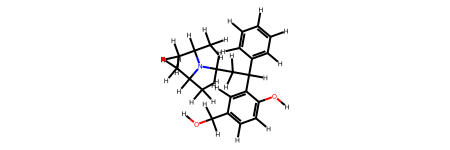

In [6]:
m_h

In [9]:
# When we ask to have 2D coordinates generated, they are added as a conformer
AllChem.Compute2DCoords(m_h)
m_h.GetNumConformers()

1

In [10]:
# And that conformer is flagged as not being 3D
m_h.GetConformer().Is3D()

False

In [5]:
IPythonConsole.drawMol3D(m)
# The 3D structure is not generated yet, so the structure looks flat

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [6]:
IPythonConsole.drawMol3D(m_h)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3D Structure Generation

In [12]:
AllChem.EmbedMolecule(m)
AllChem.EmbedMolecule(m_h)
# This function works in all mol element even the one that is not applied.
# 3D structure can also be generated by conformer generation method "EmbedMultipleConfs"
# EmbedMolecule only generate single conformer, if you want generate multiple ones use "EmbedMultipleConfs"

[12:29:15] Molecule does not have explicit Hs. Consider calling AddHs()


0

In [13]:
print(m.GetNumConformers(),m.GetConformer().Is3D())
print(m_h.GetNumConformers(),m_h.GetConformer().Is3D())

1 True
1 True


In [8]:
# The 3D structure is generated!
IPythonConsole.drawMol3D(m)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [9]:
IPythonConsole.drawMol3D(m_h)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.